# How to Process, Analyze and Visualize Data (III-b)
This is a course provided by MIT Open Course Ware. This notebook solves Lab 3-b, namely linear regression and multiple regression on US health data.

We start by looking a bit at the content of the file containing ypll (years of potential life lost). YPLL measures the number of years below the age of 75 that a 100 000 person group loses.
E.g., a person who dies at age 73 contributes 2 years to the sum, while a person who dies at age 77 contributes 0 year.

In [16]:
import csv
reader = csv.DictReader(open('health/ypll.csv', 'r'))
print(reader.fieldnames)

['FIPS', 'State', 'County', 'Unreliable', 'YPLL Rate']


We notice the field unreliable. Let us check a bit the first entries.

In [17]:
for index, row in enumerate(reader):
    county = row['County']
    unrel = row['Unreliable']
    ypll = row['YPLL Rate']
    if 60 < index < 72:
        print(','.join([county, unrel, ypll]))

Talladega,,11704
Tallapoosa,,9889
Tuscaloosa,,9758
Walker,,15244
Washington,,9732
Wilcox,,12613
Winston,,11287
,,7649
Aleutians East,x,11800
Aleutians West,x,6534
Anchorage,,7074


We observe that the first entry is not always present, and the entry unreliable sometimes has a cross x to say that this row of data is not reliable.
We also check the headers of the additional measure file.

In [4]:
import csv
reader = csv.DictReader(open('health/additional_measures_cleaned.csv', 'r'))
print(reader.fieldnames)

['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 'African American', 'Female', 'Rural', '%Diabetes', 'HIV rate', 'Physical Inactivity', 'mental health provider rate', 'median household income', '% high housing costs', '% Free lunch', '% child Illiteracy', '% Drive Alone']


We are interested in correlating ypll with other measurements, say diabetes, less than 18 of age, and median household income. For that, we will do 3 scatterplots, the first one showing ypll vs diabetes, the 2nd one showing ypll vs less than 18 and then 3rd one showing diabetes vs median income. Both ypll and other measurements are done by county. So first we create the data for ypll, we extract it per county, we remove the unreliable data, and we also remove the data where the county does not appear.

In [1]:
import csv
reader1 = csv.DictReader(open('health/ypll.csv', 'r'))
ypll_data = {}
for row in reader1:
    county = row['County']
    unrel = row['Unreliable']
    ypll = row['YPLL Rate']
    if county != ""  and unrel != "x" and ypll !="":
        ypll_data.update({county:ypll})

We also remove empty fields from the other measurements we are interested in.

In [2]:
reader2 = csv.DictReader(open('health/additional_measures_cleaned.csv', 'r'))
d18mi_data = {}
for row in reader2:
    county = row['County']
    diabetes = row['%Diabetes']
    below = row['< 18']
    income = row['median household income']
    if county != ""  and diabetes != "" and below != "" and income != "":
        d18mi_data.update({county:[diabetes,below,income]})

We merge both data sets, so that for each county, we get the other measurements with the ypll.

In [3]:
k1 = ypll_data.keys()
k2 = d18mi_data.keys()
#after having gathered the keys for both dictionaries, compute their intersection
k = [key for key in k1 if key in k2]
ypll_d18mi = {}
for key in k:
    merge_data = [ypll_data[key]]+d18mi_data[key]
    ypll_d18mi.update({key:merge_data})

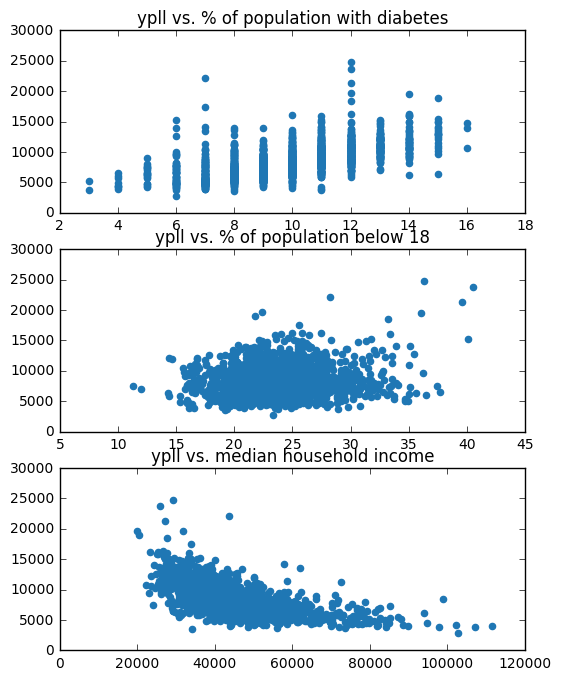

In [4]:
import matplotlib.pyplot as plt

ypll_d18mi_data = list(ypll_d18mi.values())

ypll = [ypll_d18mi_data[i][0] for i in range(len(ypll_d18mi_data))]
diabetes = [ypll_d18mi_data[i][1] for i in range(len(ypll_d18mi_data))]
below = [ypll_d18mi_data[i][2] for i in range(len(ypll_d18mi_data))]
income = [ypll_d18mi_data[i][3] for i in range(len(ypll_d18mi_data))]

fig = plt.figure(figsize = (6,8))

subplot = fig.add_subplot(311)
subplot.scatter(diabetes,ypll,color="#1f77b4")
subplot.set_title("ypll vs. % of population with diabetes")

subplot = fig.add_subplot(312)
subplot.scatter(below,ypll,color="#1f77b4")
subplot.set_title("ypll vs. % of population below 18")

subplot = fig.add_subplot(313)
subplot.scatter(income,ypll,color="#1f77b4")
subplot.set_title("ypll vs. median household income")

plt.show()

The first plot shows that when diabetes increases, so does the mortality rate (*positive correlation*). The second plot does not seem to show any specific pattern. The third plot shows that when the income increases, the mortality decreases (*negative correlation*).

## Exercise 1
Look at the scatter plots of other variables vs ypll.

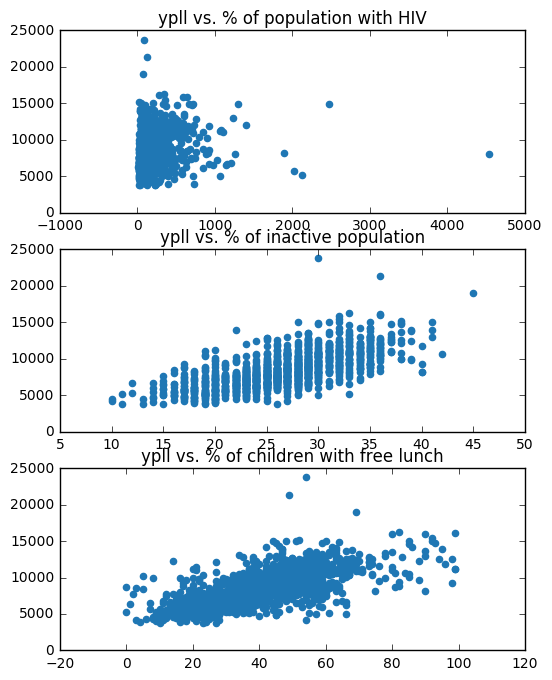

In [1]:
import csv
import matplotlib.pyplot as plt

reader1 = csv.DictReader(open('health/ypll.csv', 'r'))
ypll_data = {}
for row in reader1:
    county = row['County']
    unrel = row['Unreliable']
    ypll = row['YPLL Rate']
    if county != ""  and unrel != "x" and ypll !="":
        ypll_data.update({county:ypll})
        
reader2 = csv.DictReader(open('health/additional_measures_cleaned.csv', 'r'))
hvinlu_data = {}
for row in reader2:
    county = row['County']
    hiv = row['HIV rate']
    inactivity = row['Physical Inactivity']
    lunch = row['% Free lunch']
    if county != ""  and hiv != "" and inactivity != "" and lunch != "":
        hvinlu_data.update({county:[hiv,inactivity,lunch]})
        
        
k1 = ypll_data.keys()
k2 = hvinlu_data.keys()
#after having gathered the keys for both dictionaries, compute their intersection
k = [key for key in k1 if key in k2]
ypll_hvinlu = {}
for key in k:
    merge_data = [ypll_data[key]]+hvinlu_data[key]
    ypll_hvinlu.update({key:merge_data})
    
ypll_hvinlu_data = list(ypll_hvinlu.values())

ypll = [ypll_hvinlu_data[i][0] for i in range(len(ypll_hvinlu_data))]
hiv = [ypll_hvinlu_data[i][1] for i in range(len(ypll_hvinlu_data))]
inactivity = [ypll_hvinlu_data[i][2] for i in range(len(ypll_hvinlu_data))]
lunch = [ypll_hvinlu_data[i][3] for i in range(len(ypll_hvinlu_data))]

fig = plt.figure(figsize = (6,8))

subplot = fig.add_subplot(311)
subplot.scatter(hiv,ypll,color="#1f77b4")
subplot.set_title("ypll vs. % of population with HIV")

subplot = fig.add_subplot(312)
subplot.scatter(inactivity,ypll,color="#1f77b4")
subplot.set_title("ypll vs. % of inactive population")

subplot = fig.add_subplot(313)
subplot.scatter(lunch,ypll,color="#1f77b4")
subplot.set_title("ypll vs. % of children with free lunch")

plt.show()

## Ordinary Linear Regressions
(The references I used are http://clic.cimec.unitn.it/methods/R/lectures/ordinary-regression.pdf and http://www.stat.ufl.edu/~winner/qmb3250/notespart2.pdf)
We have *response* or *dependent* variables on the one hand, and *explanatory* or *independent* variables on the other hand, and we are looking for a model that produces a value for the dependent variables for each setting of the independent variables.
E.g. here, the dependent variable is ypll, and the independent variable is the diabetes percentage, and for each diabetes percentage, we want to produce a value for ypll.

In a *linear* model, a variable related to the dependent variables (it could be the dependent variable itself) is modeled as the sum of the values of the independent variables (independent variables might be generated by non-linear functions), each multiplied by a constant which is estimated from the sample data (the sum may include a constant term). E.g., the dependent variable ypll is modelled as $ {\rm ypll} = \beta_0 + x \beta_1$ where $x$ is for example diabetes data. The problem is then to find the weights (here $\beta_0,\beta_1$) so that the observed distribution best *fits the model*.

In a deterministic linear model, we have $y = \beta_0 + x \beta_1$ and given $x$, we get $y$.
In a probabilistic linear model, we have $y = \beta_0 + x \beta_1 + \epsilon$ where $\epsilon$ is normally distributed with variance $\sigma^2$, and $\epsilon$ could be interpreted as an error term. In this case, we have that $E[y|x]=\beta_0+x\beta_1$, so $\beta_0+x\beta_1$ gives us the average behavior of $y$ given $x$ rather than $y$ given $x$, and $y|x$ is normally distributed with variance $\sigma^2$.

One way to find the weight coefficients (here $\beta_0,\beta_1$) is to use a least square estimation. Suppose we have only two data points $(x_1,y_1)$, $(x_2,y_2)$, then we are looking for $\beta_0,\beta_1$ such that $$y_1 = \beta_0 + x_1 \beta_1,y_2 = \beta_0 + x_2 \beta_1, $$ we have a system of two equations for two unknowns, and we can solve for $\beta_0,\beta_1$. 
Now suppose we have three data points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$. We still are looking for $\beta_0,\beta_1$ such that $$y_1 = \beta_0 + x_1 \beta_1,y_2 = \beta_0 + x_2 \beta_1,y_3 = \beta_0 + x_3 \beta_1,  $$ only this time, the system is likely to have no exact solution (apart if the points are actually aligned), so the least square methods consists of finding $\beta_0,\beta_1$ such that $$|y_1 - \beta_0 - x_1 \beta_1|^2,|y_2 -\beta_0 - x_2 \beta_1|^2, |y_3 -\beta_0 - x_3 \beta_1|^2$$  are as small as possible (0 being the case where all points perfectly fit the line). For a toy example with 3 points, this can be solved by hand by taking the sum of the squares, and then computing the partial derivative with respect to $\beta_0$ and $\beta_1$ to find their minimum.

The example with 3 points is a particular case of a system of equations of the form
$$ 
{\bf y} = {\bf X}\beta
$$
(in the example ${\bf y}=(y_1,y_2,y_3)^T$, ${\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}$ and $\beta=(\beta_0,\beta_1)^T$.

The least square error for ${\bf y}={\bf X}\beta$ consists of finding $\beta$ that minimizes 
$S(\beta)=||{\bf y}-{\bf X}\beta||^2$. When ${\bf X}^T{\bf X}$ is positive definite, we can find the optimal $\beta$ as follows (as explained here: https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)):

Note thet $S(\beta)={\bf y}^T{\bf y}-2\beta^T{\bf X}^T{\bf y}+\beta^T{\bf X}^T{\bf X}\beta$ since the middle term is a scalar. 
* option 1: differentiate with respect to $\beta$ and equate to zero to obtain $$\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}$$ and then argue that this is a minimum since ${\bf X}$ has full column rank.
* option 2: define the inner product $\langle x,y\rangle = x^T {\bf X}^T{\bf X} y$ and notice that $S(\beta)=\langle \beta-({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y},\beta-({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y} \rangle+ C$ where $C$ does not depend on $\beta$, and therefore the minimum is reached when $\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}$.

r-squared: 0.385817417579
line: 737.885344365 1161.80946085


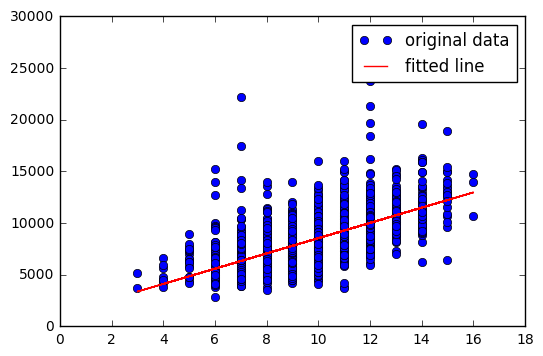

In [11]:
#scipy.stats.linregress(x,y)
#Calculate a linear least-squares regression for two sets of measurements.
#parameters: x, y : Both arrays should have the same length.
#returns: slope of the regression line, intercept of the regression line, 
#rvalue (correlation coefficient), pvalue (two-sided p-value for a hypothesis test whose 
#null hypothesis is that the slope is zero, stderr (Standard error of the estimated gradient)

import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

diabetes_int = np.array([int(perc) for perc in diabetes])
ypll_int = np.array([int(perc) for perc in ypll])

slope,intercept,r_value,p_value,std_err = stats.linregress(diabetes_int,ypll_int)

print('r-squared:',r_value**2)
print('line:',slope,intercept)

plt.plot(diabetes_int, ypll_int, 'o', label='original data')
plt.plot(diabetes_int, intercept + slope*diabetes_int, 'r', label='fitted line')
plt.axis([0,18,0,30000])
plt.legend()
plt.show()

Since we derived the formula for $\beta$ above, we can check we get the same result as the linear regression function.

In [34]:
from numpy.linalg import inv
X = np.matrix([np.ones(len(diabetes_int)),diabetes_int])
beta = inv(X*X.transpose())*X*np.matrix(ypll_int).transpose()
beta

matrix([[ 1161.80946085],
        [  737.88534437]])

We can also compute the coefficient r-squared, which is given (here) by
$$R^2 = 1 - \frac{\sum(y_i-(\beta_1 x_i +\beta_0))^2}{\sum(y_i-\bar{y})^2},$$
where $\bar{y}$ is the mean. This coefficient captures how good the regression is, the closer it is to 1, the better the data fits the model. The numerator term is 0 when all the points are aligned on the line. The denominator captures the variation from the mean.

In [41]:
yt = np.matrix(ypll_int).transpose()
xt = np.matrix(diabetes_int).transpose()

ymean = np.mean(yt)
SSres = 0
SStot = 0
for i in range(len(diabetes)):
    SSres = SSres + (yt[i]-(beta[1]*xt[i]+beta[0]))**2
    SStot = SStot + (yt[i]-ymean)**2
1-SSres/SStot

matrix([[ 0.38581742]])

We do obtain the same $r$-squared coefficient, which is roughly 0.38.
If we had obtained 1, this would have meant that 100% of the changes in YPLL are predicted by
the linear regression, so we have about 38% of the changes in YPLL predicted.

## Exercise 2
Run the correlations for percentage of population under 18 years of age and median household
income.

In [43]:
below_float = np.array([float(perc) for perc in below])
income_int = np.array([int(perc) for perc in income])
ypll_int = np.array([int(perc) for perc in ypll])

slopeb,interceptb,r_valueb,p_valueb,std_errb = stats.linregress(below_float,ypll_int)
slopei,intercepti,r_valuei,p_valuei,std_erri = stats.linregress(income_int,ypll_int)

print('r-squared for below age 18:',r_valueb**2)
print('r-squared for median income:',r_valuei**2)

r-squared for below age 18: 0.0298674240726
r-squared for median income: 0.365107052655


We observe much more signifiance for the median income than for the age.

## Exercise 3
Plot the lines calculated from the regression for each of these independent variables.

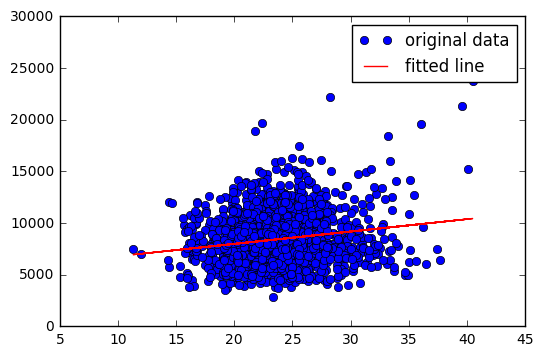

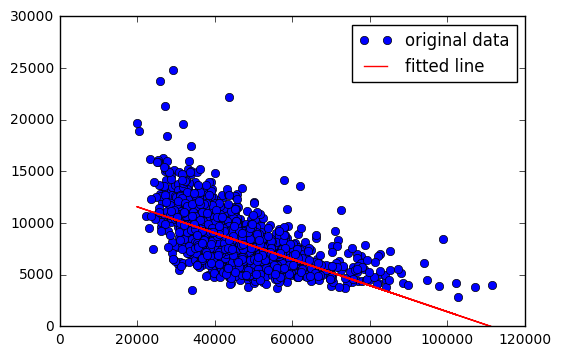

In [45]:
plt.plot(below_float, ypll_int, 'o', label='original data')
plt.plot(below_float, interceptb + slopeb*below_float, 'r', label='fitted line')
plt.axis([5,45,0,30000])
plt.legend()
plt.show()

plt.plot(income_int, ypll_int, 'o', label='original data')
plt.plot(income_int, intercepti + slopei*income_int, 'r', label='fitted line')
plt.axis([0,120000,0,30000])
plt.legend()
plt.show()

## Exercise 4
Run the correlation for % of children eligible for school lunches.

r-squared: 0.4649340312


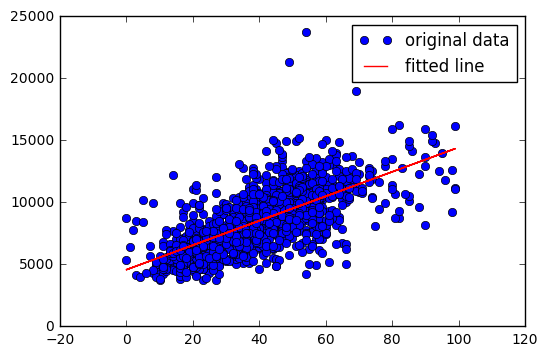

In [49]:
lunch_int = np.array([int(perc) for perc in lunch])
ypll_int = np.array([int(perc) for perc in ypll])

slopel,interceptl,r_valuel,p_valuel,std_errl = stats.linregress(lunch_int,ypll_int)

print('r-squared:',r_valuel**2)

plt.plot(lunch_int, ypll_int, 'o', label='original data')
plt.plot(lunch_int, interceptl + slopel*lunch_int, 'r', label='fitted line')
plt.axis([-20,120,0,25000])
plt.legend()
plt.show()

It is significant, the $r$-squared coefficient is high enough (in particular comparing to these we got), it is positively correlated (the slope is positive).

We next combine information from multiple measures, this is called a *multiple regression*.
We combine household income, diabetes, and population under 18.

In [56]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

diabetes_int = np.array([int(perc) for perc in diabetes])
below_float = np.array([float(perc) for perc in below])
income_int = np.array([int(perc) for perc in income])
X = np.array([diabetes_int,below_float,income_int])
ypll_int = np.array([int(perc) for perc in ypll])

# LinearRegression will take in its fit method arrays X, y and 
# will store the coefficients beta of the linear model in coef_ and intersect_

# we check it works with diabetes only
reg1 = linear_model.LinearRegression()
reg1.fit (diabetes_int.reshape(-1,1), ypll_int)
print(reg1.coef_,reg1.intercept_)
# we need to compute r-squared separately
print(r2_score(ypll_int, reg1.coef_*diabetes_int+reg1.intercept_)) 

# mutliple regression
reg2 = linear_model.LinearRegression()
reg2.fit (X.T, ypll_int)
print(reg2.coef_,reg2.intercept_)
# we need to compute r-squared separately
print(r2_score(ypll_int, np.matrix(X.T)*np.matrix(reg2.coef_).transpose()+reg2.intercept_)) 

[ 737.88534437] 1161.80914181
0.385817417578
[  4.94091897e+02   1.44341077e+02  -8.38219305e-02] 3902.43906929
0.535716583394


## Exercise 5
Try other multiple regressions to get an r-squared value higher.

In [3]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

hiv_float = np.array([float(perc) for perc in hiv])
inactivity_float = np.array([float(perc) for perc in inactivity])
lunch_float = np.array([float(perc) for perc in lunch])

X = np.array([hiv_float,inactivity_float,lunch_float])
ypll_int = np.array([int(perc) for perc in ypll])

# mutliple regression
reg3 = linear_model.LinearRegression()
reg3.fit (X.T, ypll_int)
print(reg3.coef_,reg3.intercept_)
# we need to compute r-squared separately
print(r2_score(ypll_int, np.matrix(X.T)*np.matrix(reg3.coef_).transpose()+reg3.intercept_)) 

[   0.32515191  204.61894391   60.89858187] 560.269113386
0.607198237422


It is useful to remember that correlation does not mean causation. Correlation means that two variables are moving together, it does not mean that one moves the other (there could be other factors that are provoking this move).